In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
import pandas as pd
import tensorflow as tf
from tqdm import tqdm


import gym
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Enable this code to disable the GPU execution

physical_devices = tf.config.list_physical_devices('GPU')
try:
  # Disable all GPUS
  tf.config.set_visible_devices([], 'GPU')
  visible_devices = tf.config.get_visible_devices()
  for device in visible_devices:
    assert device.device_type != 'GPU'
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

tf.compat.v1.disable_eager_execution()

In [4]:
def plot(file, title, exp):
    
    df = pd.read_csv(file)
    fig, ax1 = plt.subplots(figsize=(6,5))

    ax1.set_xlabel('Episodes')
    ax1.set_ylabel('Reward')
    ax1.plot(df.iloc[:,0], df["Reward"], color='grey', label="Reward")
    plt.legend(loc='upper left',frameon=False)
    ax1.plot(df.iloc[:,0], df["Mean_Reward"], color='black', label="100 SMA")
    ax1.tick_params(axis='y')
    plt.axhline(y=200, color='g', linestyle='--')
    plt.ylim((-400,400))
    plt.xlim((0,2000))
    plt.legend(loc='upper left',frameon=False)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    
    ax2.set_ylabel('Epsilon')  # we already handled the x-label with ax1
    ax2.plot(df.iloc[:,0], df["Epsilon"], color='red', label="Epsilon")
    ax2.tick_params(axis='y')
    plt.ylim((0,1.2))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("Exp. "+str(exp)+" - Episodes: "+str(df.shape[0])+"\n"+title)
    plt.legend(loc='upper right',frameon=False)

    #plt.show()
    

In [5]:
files = [
        "0p01_0p0001.csv",
        "0p01_0p001.csv",
        "0p01_0p01.csv",
        "0p1_0p0001.csv",
        "0p1_0p001.csv",
        "0p1_0p01.csv",
         "1p0_0p0005.csv",
        "1p0_0p0001.csv",
        "1p0_0p001.csv",
        "1p0_0p01.csv",
        "ep001_0p001_0p0005.csv",
        "ep095_0p001_0p0005.csv",
        "ep_0995_0p001_0p0005.csv",
        "ep100_0p001_0p0005.csv",
        "g95_ep0p995_0p001_0p0001.csv",
        "g95_ep0p995_0p001_0p0005.csv",
        "g98_ep0p995_0p001_0p0001.csv",
        "g98_ep0p995_0p001_0p0005.csv"
]
len(files)

18

In [6]:
models = ["0p01_0p0001.h5",
        "0p01_0p001.h5",
        "0p01_0p01.h5",
        "0p1_0p0001.h5",
        "0p1_0p001.h5",
        "0p1_0p01.h5",
        "1p0_0p0005.h5",
        "1p0_0p0001.h5",
        "1p0_0p001.h5",
        "1p0_0p01.h5",
        "ep0p01_0p001_0p0005.h5",
        "ep095_0p001_0p0005.h5",
        "ep_0995_0p001_0p0005.h5",
        "ep100_0p001_0p0005.h5",
        "g95_ep0p995_0p001_0p0001.h5",
          "g95_ep0p995_0p001_0p0005.h5",
        "g98_ep0p995_0p001_0p0001.h5",
         "g98_ep0p995_0p001_0p0005.h5",]
len(models)

18

In [7]:
title = [
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.01",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.01",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.01",
        "\u03B5 = 0.010; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.950; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 1.000; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.95; \u03C4 = 0.001; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.95; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.98; \u03C4 = 0.001; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.98; \u03C4 = 0.001; \u03B1 = 0.0005",]
len(title)

18

In [8]:
len(files) is len(title) is len(models)

True

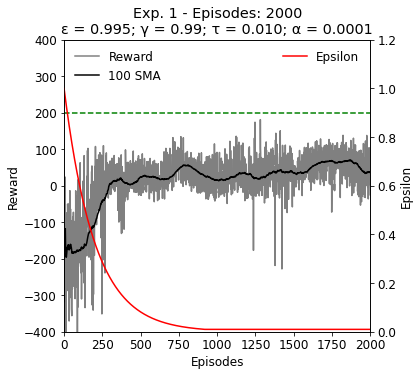

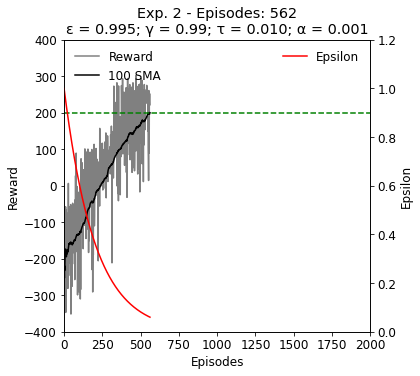

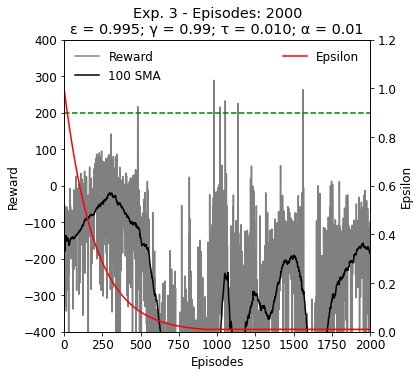

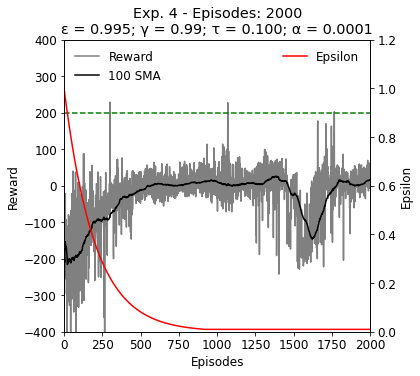

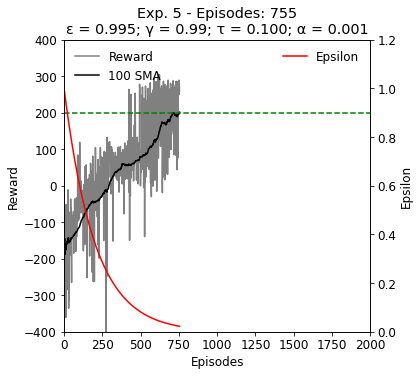

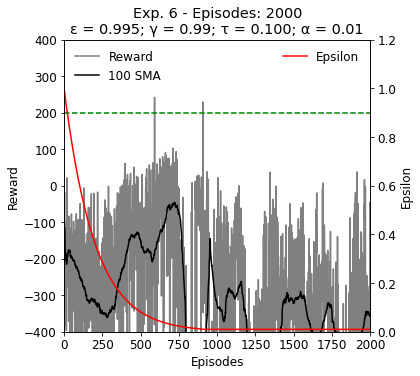

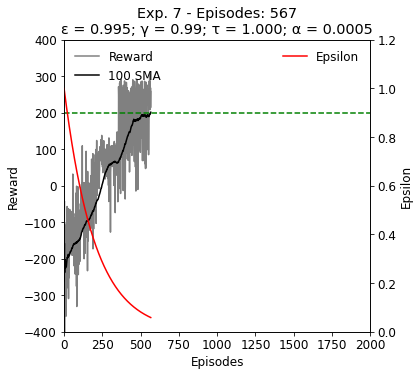

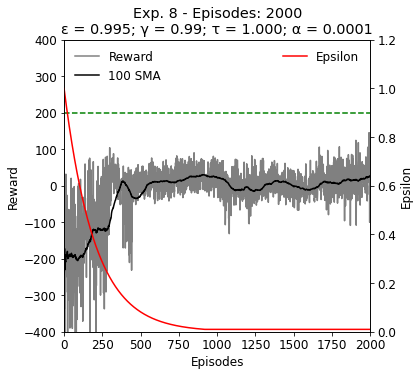

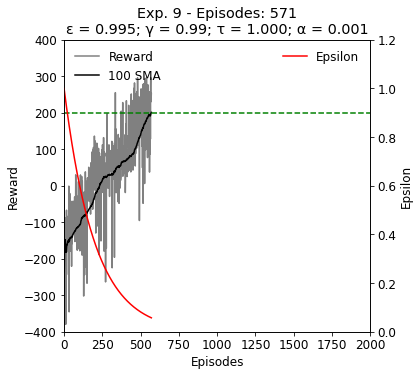

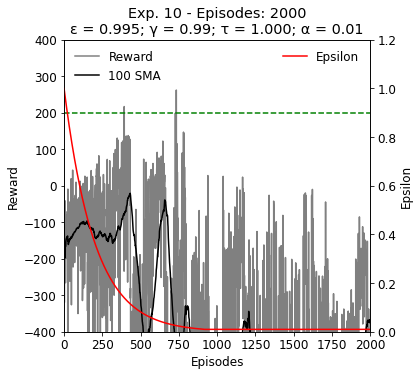

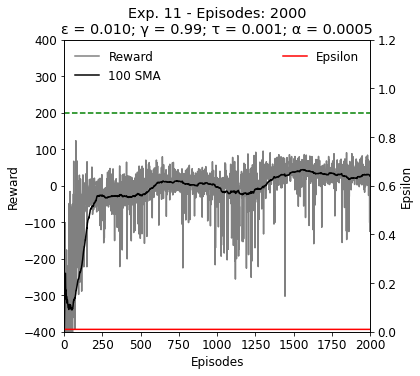

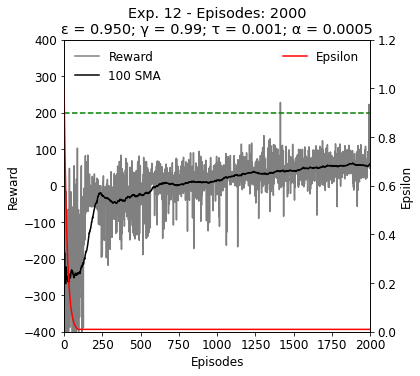

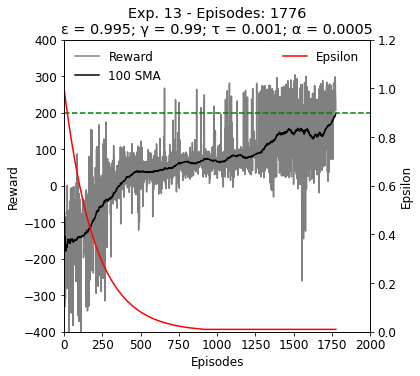

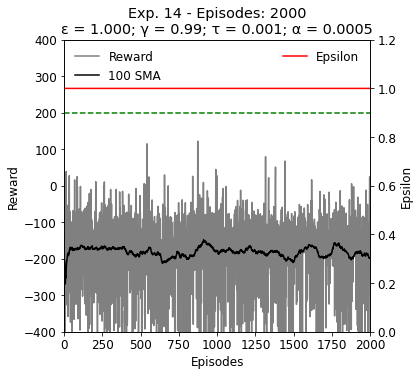

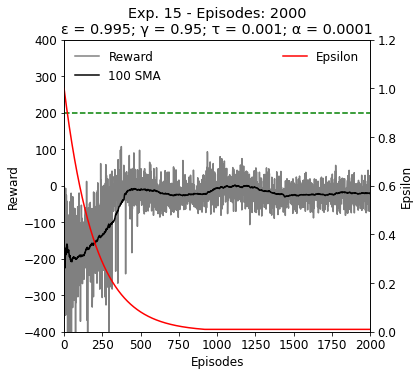

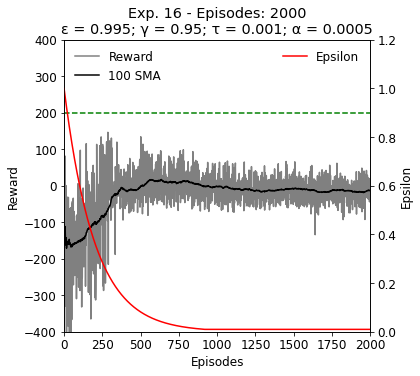

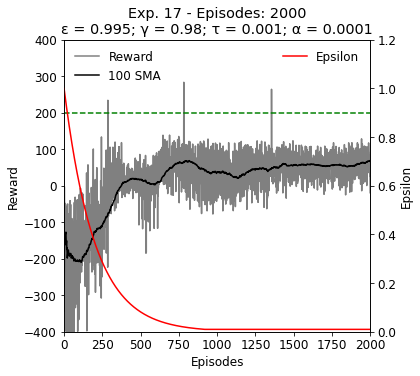

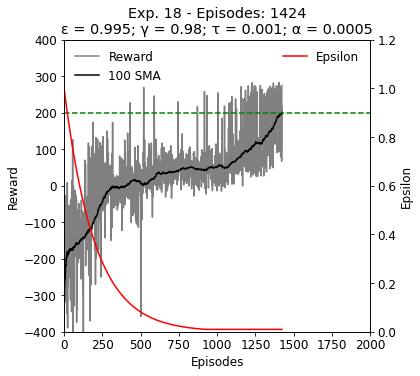

In [9]:
e = 0
for case in range(len(files)):
    e+=1
    plot(files[case], title[case], exp = e)

In [69]:
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])
df6 = pd.read_csv(files[5])
df7 = pd.read_csv(files[6])
df8 = pd.read_csv(files[7])
df9 = pd.read_csv(files[8])
df10 = pd.read_csv(files[9])
df11 = pd.read_csv(files[10])
df12 = pd.read_csv(files[11])
df13 = pd.read_csv(files[12])
df14 = pd.read_csv(files[13])
df15 = pd.read_csv(files[14])
df16 = pd.read_csv(files[15])
df17 = pd.read_csv(files[16])
df18 = pd.read_csv(files[17])
df19 = pd.read_csv("ANN16.csv")
df20 = pd.read_csv("ANN32.csv")

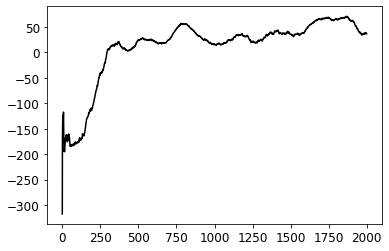

In [19]:
plt.plot(df1.iloc[:,0], df1["Mean_Reward"], color='black', label="100 SMA")

In [70]:
title = [
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010; \u03B1 = 0.01",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.100; \u03B1 = 0.01",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.001",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 1.000; \u03B1 = 0.01",
        "\u03B5 = 0.010; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.950; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 1.000; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.95; \u03C4 = 0.001; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.95; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.98; \u03C4 = 0.001; \u03B1 = 0.0001",
        "\u03B5 = 0.995; \u03B3 = 0.98; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",
        "\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005",]
len(title)

20

Text(0.5, 1.0, 'ε = 0.995; γ = 0.99; τ = 0.010')

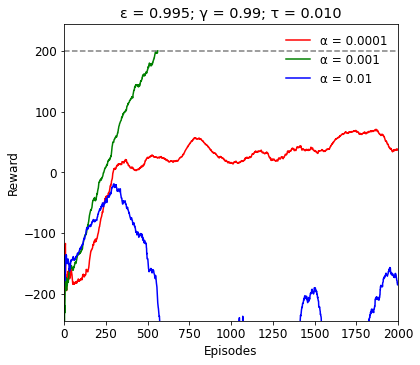

In [62]:
#varying alpha tau = 0.01

fig, ax1 = plt.subplots(figsize=(6,5))

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Reward')

ax1.plot(df1.iloc[:,0], df1["Mean_Reward"], color='r', label="\u03B1 = 0.0001")
ax1.plot(df2.iloc[:,0], df2["Mean_Reward"], color='g', label="\u03B1 = 0.001")
ax1.plot(df3.iloc[:,0], df3["Mean_Reward"], color='b', label="\u03B1 = 0.01")
ax1.tick_params(axis='y')
plt.axhline(y=200, color='grey', linestyle='--')
plt.ylim((-245,245))
plt.xlim((0,2000))
plt.legend(loc='upper right',frameon=False)


    

fig.tight_layout() 
plt.title("\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.010")



Text(0.5, 1.0, 'ε = 0.995; γ = 0.99; τ = 1.000')

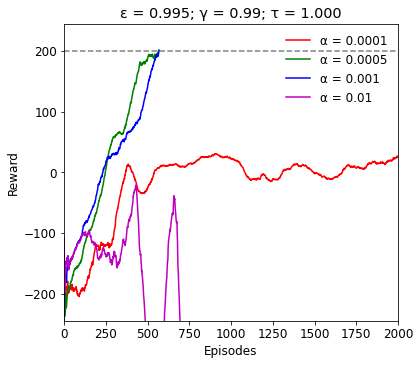

In [59]:
#varying alpha tau = 1.0 (hard update)

fig, ax1 = plt.subplots(figsize=(6,5))
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Reward')

ax1.plot(df8.iloc[:,0], df8["Mean_Reward"], color='r', label="\u03B1 = 0.0001")
ax1.plot(df7.iloc[:,0], df7["Mean_Reward"], color='g', label="\u03B1 = 0.0005")
ax1.plot(df9.iloc[:,0], df9["Mean_Reward"], color='b', label="\u03B1 = 0.001")
ax1.plot(df10.iloc[:,0], df10["Mean_Reward"], color='m', label="\u03B1 = 0.01")

ax1.tick_params(axis='y')
plt.axhline(y=200, color='grey', linestyle='--')
plt.ylim((-245,245))
plt.xlim((0,2000))
plt.legend(loc='upper right',frameon=False)

fig.tight_layout() 
plt.title("\u03B5 = 0.995; \u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005")

Text(0.5, 1.0, 'ε = 0.995; γ = 0.99; α = 0.001')

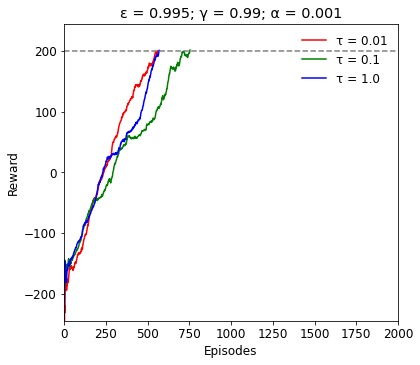

In [63]:
#tau
fig, ax1 = plt.subplots(figsize=(6,5))

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Reward')

ax1.plot(df2.iloc[:,0], df2["Mean_Reward"], color='r', label="\u03C4 = 0.01")
ax1.plot(df5.iloc[:,0], df5["Mean_Reward"], color='g', label="\u03C4 = 0.1")
ax1.plot(df9.iloc[:,0], df9["Mean_Reward"], color='b', label="\u03C4 = 1.0")
ax1.tick_params(axis='y')
plt.axhline(y=200, color='grey', linestyle='--')
plt.ylim((-245,245))
plt.xlim((0,2000))
plt.legend(loc='upper right',frameon=False)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    

fig.tight_layout() 
plt.title("\u03B5 = 0.995; \u03B3 = 0.99; \u03B1 = 0.001")

Text(0.5, 1.0, 'ε = 0.995; τ = 0.001; α = 0.0005')

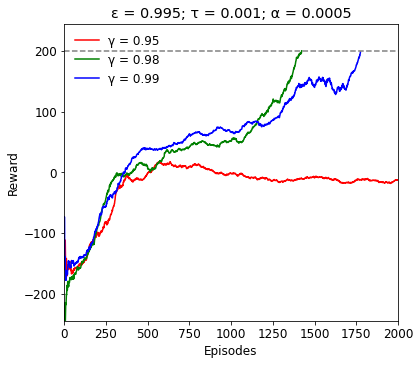

In [68]:
#varying gamma

fig, ax1 = plt.subplots(figsize=(6,5))

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Reward')

ax1.plot(df16.iloc[:,0], df16["Mean_Reward"], color='r', label="\u03B3 = 0.95")
ax1.plot(df18.iloc[:,0], df18["Mean_Reward"], color='g', label="\u03B3 = 0.98")
ax1.plot(df13.iloc[:,0], df13["Mean_Reward"], color='b', label="\u03B3 = 0.99")

ax1.tick_params(axis='y')
plt.axhline(y=200, color='grey', linestyle='--')
plt.ylim((-245,245))
plt.xlim((0,2000))
plt.legend(loc='upper left',frameon=False)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    

fig.tight_layout() 
plt.title("\u03B5 = 0.995; \u03C4 = 0.001; \u03B1 = 0.0005")

Text(0.5, 1.0, 'γ = 0.99; τ = 0.001; α = 0.0005')

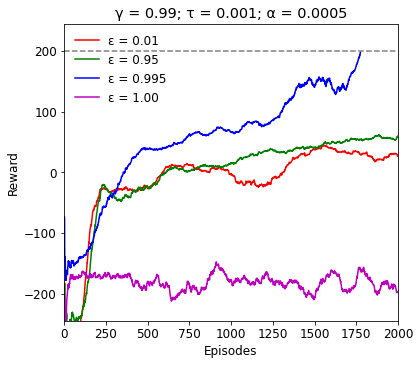

In [65]:
#varying epsilon decay

fig, ax1 = plt.subplots(figsize=(6,5))

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Reward')

ax1.plot(df11.iloc[:,0], df11["Mean_Reward"], color='r', label="\u03B5 = 0.01")
ax1.plot(df12.iloc[:,0], df12["Mean_Reward"], color='g', label="\u03B5 = 0.95")
ax1.plot(df13.iloc[:,0], df13["Mean_Reward"], color='b', label="\u03B5 = 0.995")
ax1.plot(df14.iloc[:,0], df14["Mean_Reward"], color='m', label="\u03B5 = 1.00")

ax1.tick_params(axis='y')
plt.axhline(y=200, color='grey', linestyle='--')
plt.ylim((-245,245))
plt.xlim((0,2000))
plt.legend(loc='upper left',frameon=False)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    

fig.tight_layout() 
plt.title("\u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005")

Text(0.5, 1.0, 'γ = 0.99; τ = 0.001; α = 0.0005')

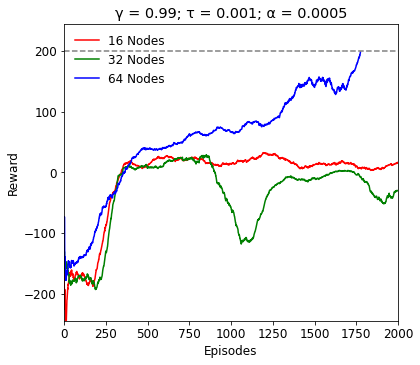

In [71]:
#varying nodes

fig, ax1 = plt.subplots(figsize=(6,5))

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Reward')

ax1.plot(df19.iloc[:,0], df19["Mean_Reward"], color='r', label="16 Nodes")
ax1.plot(df20.iloc[:,0], df20["Mean_Reward"], color='g', label="32 Nodes")
ax1.plot(df13.iloc[:,0], df13["Mean_Reward"], color='b', label="64 Nodes")

ax1.tick_params(axis='y')
plt.axhline(y=200, color='grey', linestyle='--')
plt.ylim((-245,245))
plt.xlim((0,2000))
plt.legend(loc='upper left',frameon=False)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    

fig.tight_layout() 
plt.title("\u03B3 = 0.99; \u03C4 = 0.001; \u03B1 = 0.0005")